# 1. Output analysis plots

In [1]:
import os
import random
import numpy as np
import pandas as pd
from matplotlib import figure, pyplot as plt

In [51]:
lists = os.listdir("/home/ruslan_gumerov/genitor_new/matrices/rank_100_1/")
list_new = [[x, random.random()] for x in lists]
list_new2 = [f[1]/sum([f[1] for f in list_new]) for f in list_new]
input_matrix1 = random.choices([x[0] for x in list_new], weights=list_new2)
input_matrix1

['matrice12.txt']

In [74]:
analysis_df = analysis_df.drop([0,1])
analysis_df = analysis_df.reset_index()
analysis_df

,index,iteration_vec,RF_train,RF_val
0,2,0,0.537223,0.609416
1,3,3,0.535444,0.608827
2,4,5,0.534557,0.608240
3,5,7,0.533223,0.609023
4,6,33,0.531112,0.608434
5,7,158,0.530778,0.611378
6,8,173,0.529779,0.609218
7,9,243,0.529224,0.608828
8,10,957,0.528889,0.610984
9,11,1181,0.528223,0.606279


## 1.1 Create DF with outputs

In [88]:
PATH_TO_OUTPUT = "/home/ruslan_gumerov/genitor_new/genitor_outputs/genitor_300matrices_test.out"

with open(PATH_TO_OUTPUT, "r") as inp:
    iteration_vec = []
    RF_train = []
    RF_val = []
    for line in inp:
        line = line.strip().split(" ")
        if (line[0:2] == ["New", "leader"]):
            #convert filename to iteration number (500 is a prefix, not to mess with initial matrices)
            print(line)
            iteration = int(line[2][0:-5].split("_")[1]) - 500
            iteration_vec.append(iteration)
            RF_train.append(float(line[3]))
        elif (line[0] == "RF_val:"):
            RF_val.append(float(line[1]))
            
analysis_df = {"iteration_vec" : iteration_vec, "RF_train" : RF_train, "RF_val" : RF_val}
analysis_df = pd.DataFrame(analysis_df)
analysis_df

['New', 'leader', 'matrix_515.txt,', '0.5352234000000001']
['New', 'leader', 'matrix_517.txt,', '0.535001']
['New', 'leader', 'matrix_534.txt,', '0.5347789000000001']
['New', 'leader', 'matrix_548.txt,', '0.5333332000000001']
['New', 'leader', 'matrix_622.txt,', '0.5331124']
['New', 'leader', 'matrix_632.txt,', '0.532444']
['New', 'leader', 'matrix_720.txt,', '0.5315565']
['New', 'leader', 'matrix_821.txt,', '0.5303334']
['New', 'leader', 'matrix_2001.txt,', '0.5273319999999999']
['New', 'leader', 'matrix_2612.txt,', '0.5264447']


,iteration_vec,RF_train,RF_val
0,15,0.535223,0.603926
1,17,0.535001,0.610591
2,34,0.534779,0.613336
3,48,0.533333,0.610594
4,122,0.533112,0.609806
5,132,0.532444,0.605688
6,220,0.531556,0.612752
7,321,0.530333,0.605689
8,1501,0.527332,0.610201
9,2112,0.526445,0.608043


## 1.2 Plot output DF

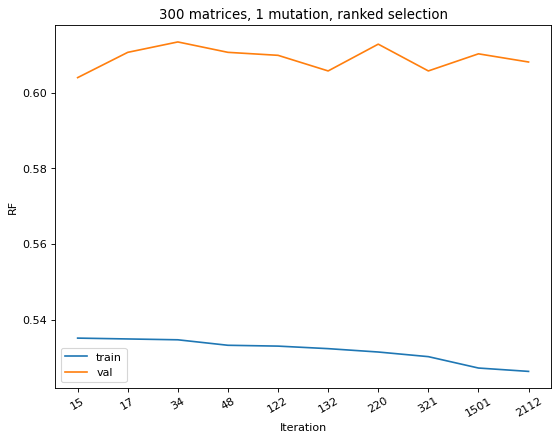

In [89]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(analysis_df['RF_train'])
plt.plot(analysis_df['RF_val'])
plt.title('300 matrices, 1 mutation, ranked selection')
plt.ylabel('RF')
plt.xlabel('Iteration')
plt.xticks(range(len(analysis_df["iteration_vec"])), analysis_df["iteration_vec"], rotation=30)
plt.legend(['train', 'val'], loc='best')
plt.show()

In [83]:
min_val = 10^9
min_tr = 10^9
if min(analysis_df["RF_val"]) < min_val:
    min_val = min(analysis_df["RF_val"])
if min(analysis_df["RF_train"]) < min_tr:
    min_tr = min(analysis_df["RF_train"])

0.6105923333333333

In [84]:
analysis_df["RF_val"]

0    0.610592
1    0.610984
2    0.613534
3    0.611572
4    0.611769
5    0.610592
6    0.612945
7    0.611573
8    0.611377
9    0.611180
Name: RF_val, dtype: float64

## 1.3 Get the smallest one

In [92]:
PATH_TO_OUTPUT_FOLDER = "/home/ruslan_gumerov/genitor_new/genitor_outputs/"
min_val = 10^9
min_tr = 10^9

for file in os.listdir(PATH_TO_OUTPUT_FOLDER):
    iteration_vec = []
    RF_train = []
    RF_val = []
    for line in inp:
        line = line.strip().split(" ")
        if (line[0:2] == ["New", "leader"]):
            #convert filename to iteration number (500 is a prefix, not to mess with initial matrices)
            iteration = int(line[2][0:-5].split("_")[1]) - 500
            iteration_vec.append(iteration)
            RF_train.append(float(line[3]))
        elif (line[0] == "RF_val:"):
            RF_val.append(float(line[1]))

    analysis_df = {"iteration_vec" : iteration_vec, "RF_train" : RF_train, "RF_val" : RF_val}
    analysis_df = pd.DataFrame(analysis_df)
    
    if min(analysis_df["RF_val"]) < min_val:
        file_val = file
        min_val = min(analysis_df["RF_val"])
    if min(analysis_df["RF_train"]) < min_tr:
        file_train = file
        min_tr = min(analysis_df["RF_train"])

print(f"final RF_val min {min_val}, file {file_val}")
print(f"final RF_train min {min_tr}, file {file_train}")

final RF_val min 0.603926, file genitor_300matrices_test.out
final RF_train min 0.5264447, file genitor_300matrices_test.out


## 1.4 Plot best RF for every serie

In [171]:
PATH_TO_OUTPUT_FOLDER = "/home/ruslan_gumerov/genitor_new/genitor_outputs/"

main = {"100" : [], "200" : [], "300" : []}
for file in os.listdir(PATH_TO_OUTPUT_FOLDER):
    with open(f"{PATH_TO_OUTPUT_FOLDER}{file}") as inp:
        RF_train = []
        RF_val = []
        for line in inp:
            line = line.strip().split(" ")
            if (line[0:2] == ["New", "leader"]):
                iteration = int(line[2][0:-5].split("_")[1]) - 500
                iteration_vec.append(iteration)
                RF_train.append(float(line[3]))
            elif (line[0] == "RF_val:"):
                RF_val.append(float(line[1]))
        typeof = os.path.splitext(file)[0].split("_")[0]
        mats = os.path.splitext(file)[0].split("_")[1]
        num = os.path.splitext(file)[0].split("_")[2]
        if typeof == "genitor":
            if num != "test" and num != "no":
                mats = mats[0:3]
                num = num[0]
                print(typeof, mats, num)
                main[mats].append([int(num), [min(RF_val), min(RF_train)]])

genitor 200 1
genitor 200 3
genitor 100 1
genitor 100 3
genitor 300 3
genitor 200 2
genitor 300 2
genitor 100 2
genitor 300 1


In [155]:
[str(x[0]) for x in sorted(main["100"])]

['1', '2', '3', '10', '20']

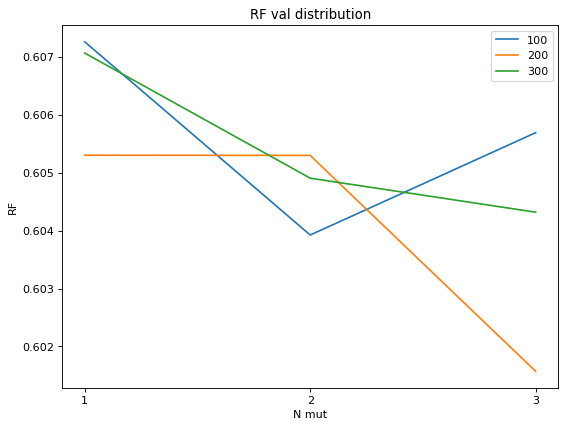

In [174]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot([x[1][0] for x in sorted(main["100"])])
plt.plot([x[1][0] for x in sorted(main["200"])])
plt.plot([x[1][0] for x in sorted(main["300"])])
plt.title('RF val distribution')
plt.ylabel('RF')
plt.xlabel('N mut')
plt.xticks([0, 1, 2], labels = [str(x[0]) for x in sorted(main["100"])])
plt.legend(['100', '200', '300'], loc='best')
plt.show()